# Altair 101

## What is altair?
Altair is an open source, declarative visualization library for Python.

It is based on Vega-lite.

It is based on the Grammar of Graphics.


## **Why altair?**

 - It's not **matplotlib**

 - Intuitive and structured

 - Easily customizable

## Limitations

 - Not as customizable

 - Can lead to **big** notebooks (100mb+)

 - No 3D Visualisations

### Basic components:
 - **Marks**: How you want the data to be represented (points, bars, circles, lines, etc.)
 - **Channels**: The componentes of the plot where that adds information (x-axis, y-axis, color, etc.) 
 - **Encodings**: What variables to use in each channel and its type (integer, category, date, etc.)

In [1]:
import pandas as pd
from vega_datasets import data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
import altair as alt
from toolz import pipe


def json_dir(data, data_dir="altairdata"):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + "/{prefix}-{hash}.{extension}"))


def setup_altair_jupyter():
    # alt.renderers.enable("mimetype")
    alt.data_transformers.register("json_dir", json_dir)
    alt.data_transformers.enable("json_dir", data_dir="altair_data")

In [3]:
setup_altair_jupyter()

In [4]:
cars = data.cars()

In [5]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


# Basic Charts

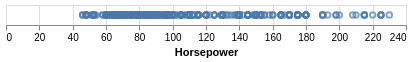

In [6]:
import altair as alt

ch = (
    alt
    .Chart(cars)
    .mark_point()
    .encode(
        x='Horsepower',
        
    )
)
ch

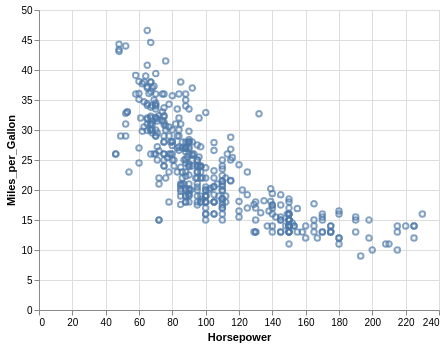

In [7]:
ch = ch.encode(y='Miles_per_Gallon',)
ch

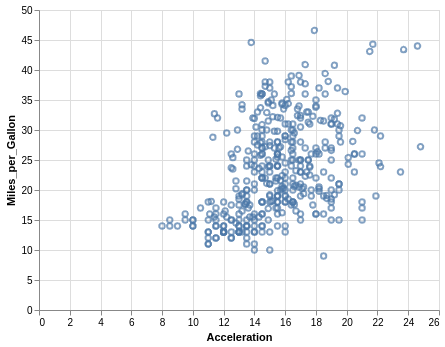

In [8]:
ch.encode(x="Acceleration")

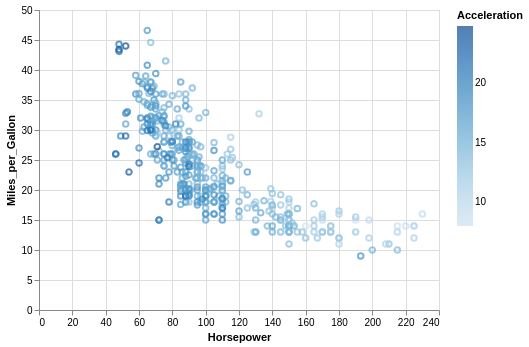

In [9]:

ch = ch.encode(
    color='Acceleration',
)
ch

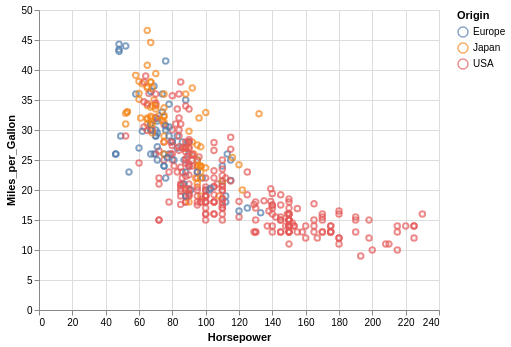

In [10]:

ch = ch.encode(
    color='Origin',
)
ch

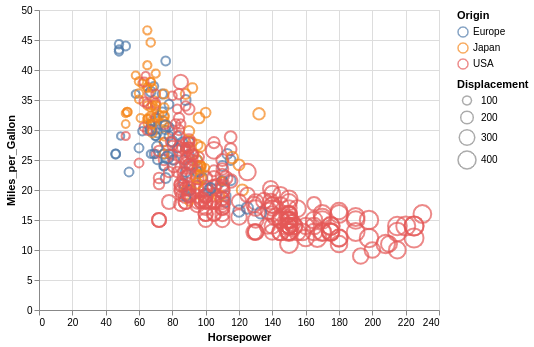

In [11]:
ch= ch.encode(size="Displacement")
ch

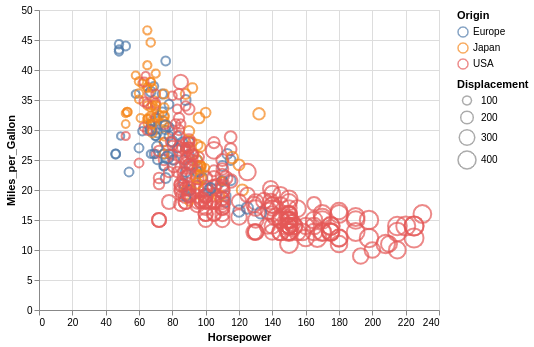

In [12]:
ch = ch.interactive()
ch

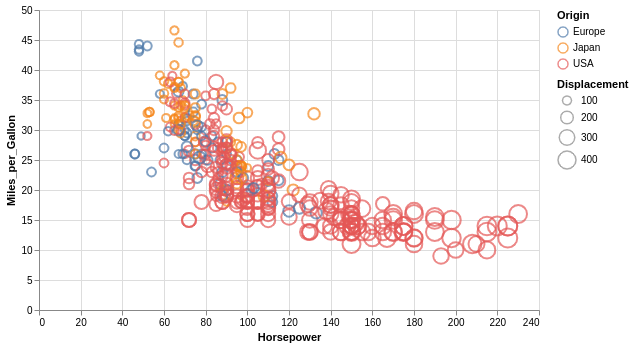

In [13]:
ch.properties(width=500)

# Data types
[There are five data types](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types): 
- quantitative (Q): a continuous real-valued quantity
- nominal (N): a discrete unordered quantity
- ordinal (O): a discrete ordered category
- temporal (T): a time or date value
- geojson (G): a geographic shape

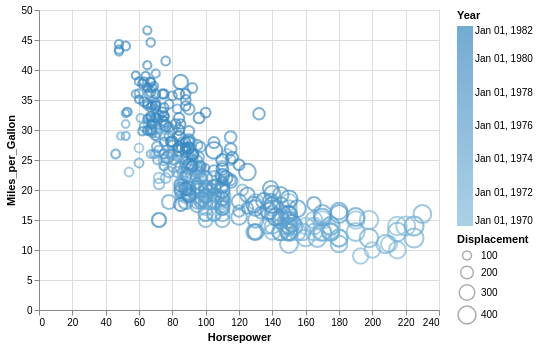

In [14]:
ch.encode(color="Year")

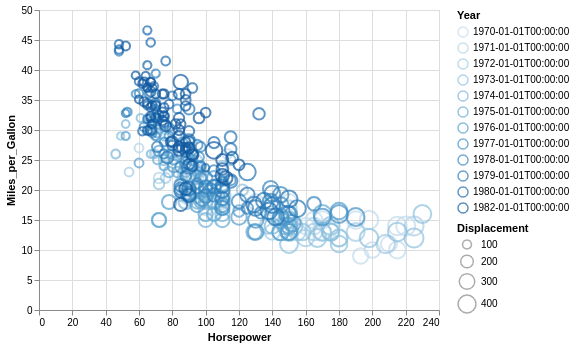

In [15]:
ch.encode(color="Year:O")

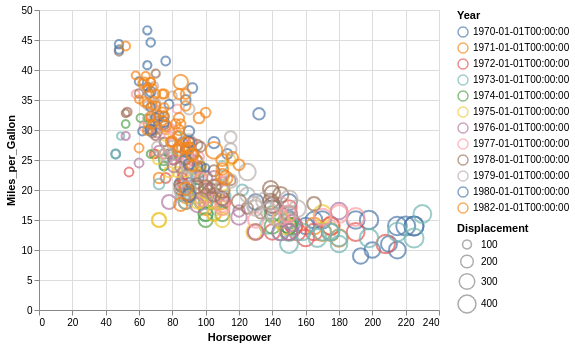

In [16]:
ch.encode(color="Year:N")

# Multiple Charts

In [17]:
ch = ch.properties(width=210, height=210)

In [18]:
ch_year = ch.encode(color="Year")
ch_acceleration = ch.encode(x="Acceleration")

## Vertical Concatenation

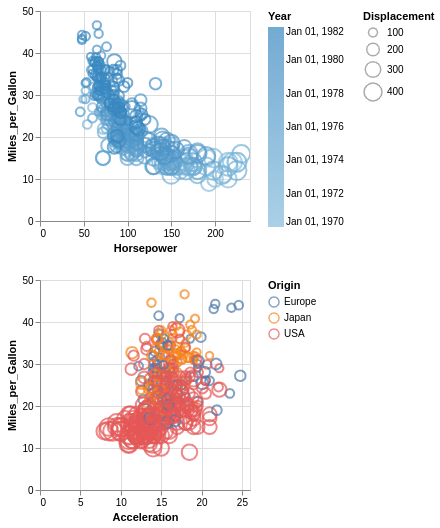

In [19]:
ch_year & ch_acceleration

## Horizontal Concatenation

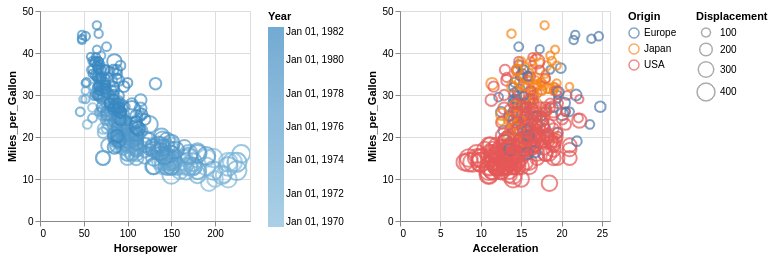

In [20]:
ch_year| ch_acceleration

## Combine

In [21]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


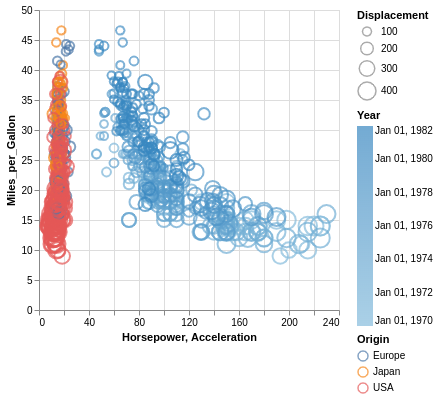

In [44]:
ch_year + ch_acceleration

### Grid

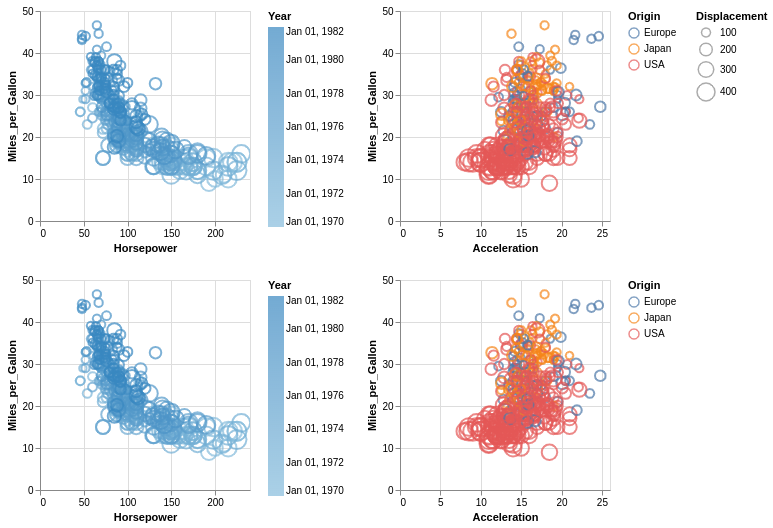

In [23]:
(
    (ch_year| ch_acceleration) 
    & (ch_year| ch_acceleration)
)

# Channel encodings

In [24]:
ch = ch.properties(width=300, height=300)
ch_year = ch_year.properties(width=300, height=300)
ch_acceleration = ch_acceleration.properties(width=300, height=300)

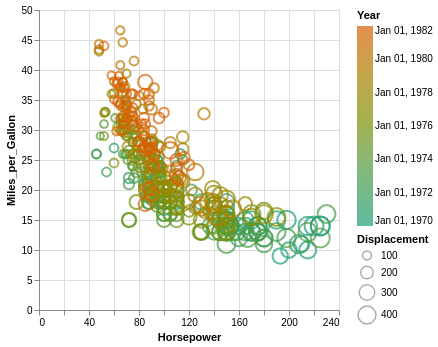

In [25]:
color = alt.Color("Year", scale=alt.Scale(scheme='dark2'))
ch_year.encode(color=color)

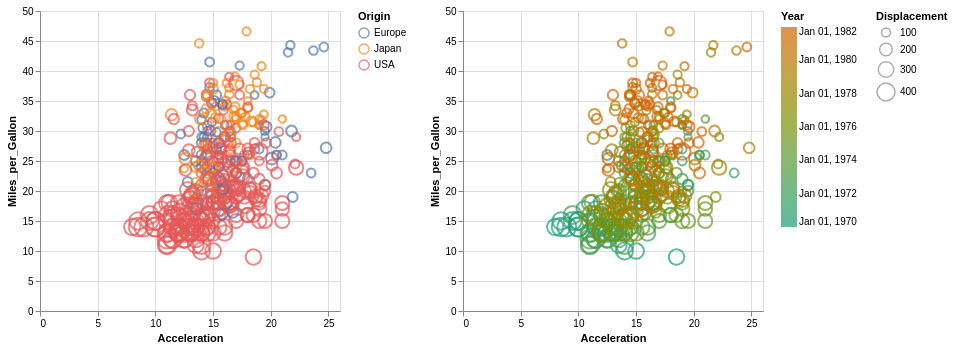

In [26]:
ch_acceleration | ch_acceleration.encode(color=color)

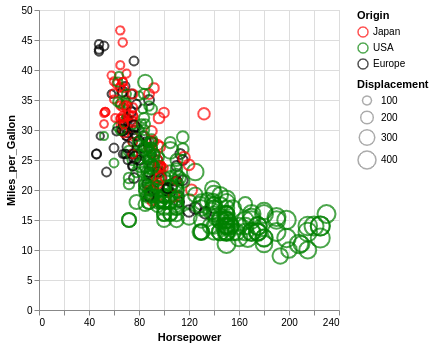

In [27]:
color_origin = alt.Color(
    "Origin",
    scale=alt.Scale(
        domain=["Japan", "USA", "Europe"],
        range=["red", "green", "black"]
    )
)
ch.encode(color=color_origin)

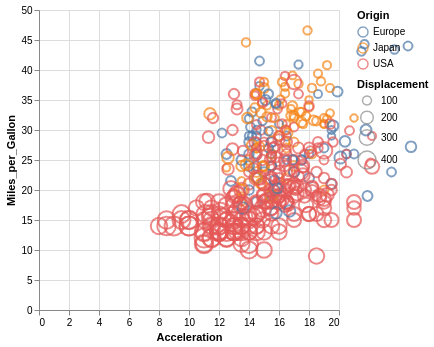

In [28]:

accelaration = alt.X("Acceleration", scale=alt.Scale(domain=[0, 20]))
ch_acceleration.selection = alt.Undefined
ch_acceleration.encode(x=accelaration)

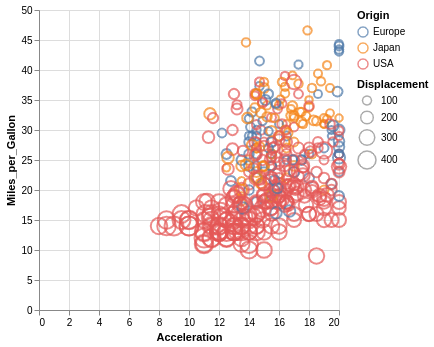

In [29]:
accelaration = alt.X(
    "Acceleration",
    scale=alt.Scale(
        domain=[0, 20],
        clamp=True,
    )
)
ch_acceleration.encode(x=accelaration)

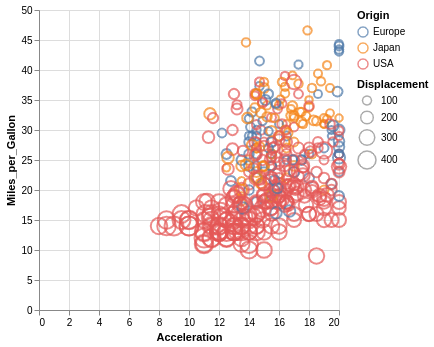

In [30]:
ch_acceleration.encode(
    x=accelaration,
    tooltip=["Acceleration", "Miles_per_Gallon"]
)

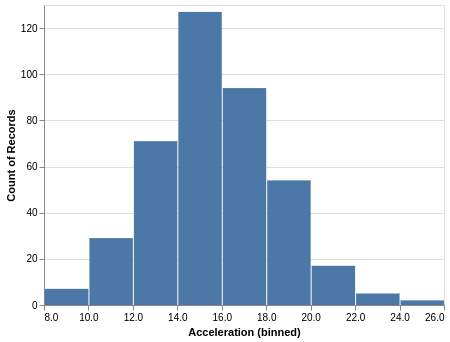

In [31]:
hist = alt.Chart(cars).mark_bar().encode(
    x=alt.X("Acceleration", bin=alt.Bin(step=2)), 
    y="count()", 
)
hist

# More charts!

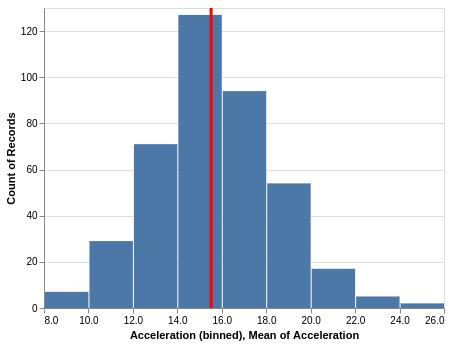

In [32]:
rule = (
        alt.Chart(cars)
        .mark_rule(color="red")
        .encode(x=f"mean(Acceleration):Q", size=alt.value(3))
    )
hist + rule

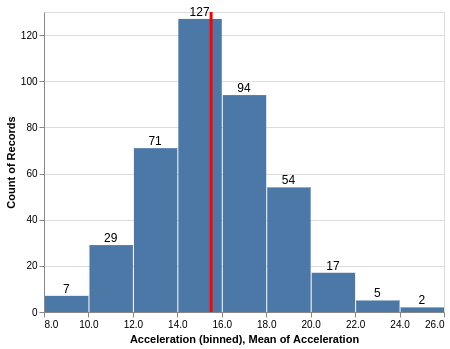

In [33]:
text = hist.mark_text(align="center", baseline="bottom").encode(
        text=alt.Text("count():Q", format=".0f"),
        size=alt.value(12),
    )

hist + rule + text

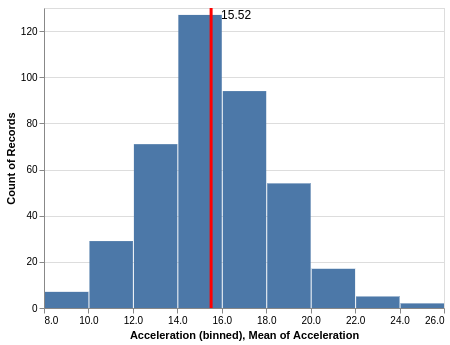

In [34]:
mean_text = rule.mark_text(align="left", baseline="top", dx=10).encode(
        y=alt.value(2),
        text=alt.Text(f"mean(Acceleration):Q", format=".2f"),
        size=alt.value(12),
    )

hist + rule + mean_text

# Interactive

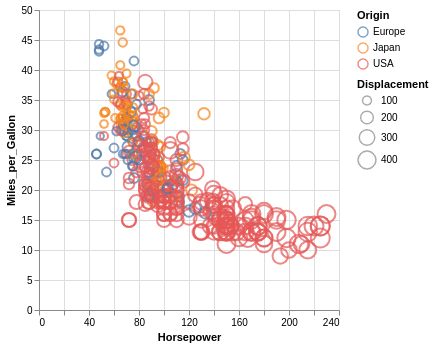

In [35]:
selection = alt.selection(type='interval')

ch.selection = alt.Undefined
points = ch.add_selection(
    selection

)
points

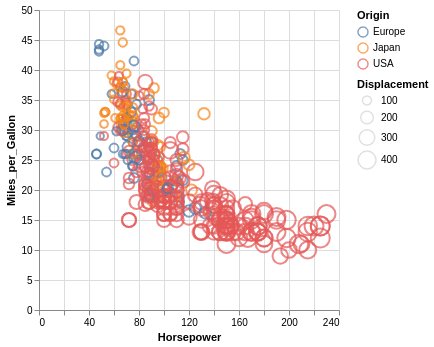

In [36]:
points = points.encode(
    color=alt.condition(
        selection, 
        'Origin', 
        alt.value('lightgray')
    )
)
points

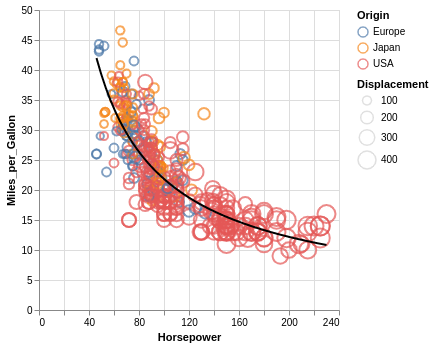

In [37]:
line = alt.Chart(cars).mark_line(color="black").encode(
    x=alt.X("Horsepower"),
    y="Miles_per_Gallon",
    
).transform_regression("Horsepower", "Miles_per_Gallon", method="pow")
points + line

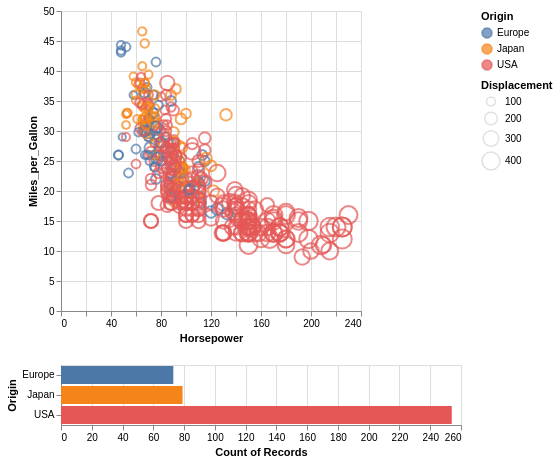

In [38]:
bars = alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
)
points & bars

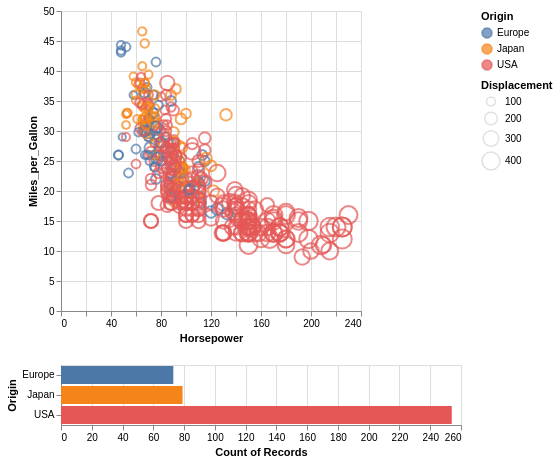

In [39]:
bars = bars.transform_filter(
    selection
)
points & bars

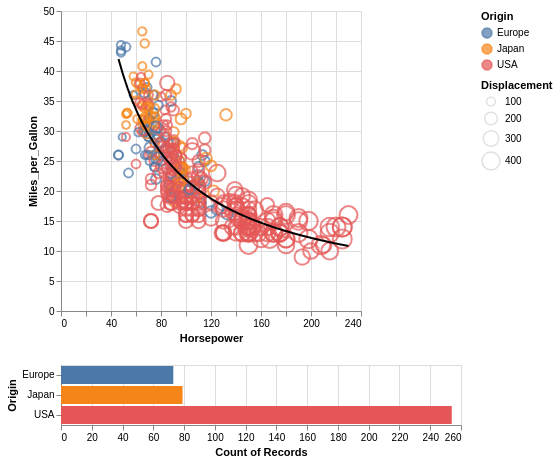

In [40]:
(points + line.transform_filter(selection)) & bars

# Tips

### Jupyter lab

In [41]:
#alt.renderers.enable("mimetype")

### Disabling max rows

In [42]:
#alt.data_transformers.disable_max_rows()

### Saving data to json

In [43]:
#alt.data_transformers.enable('json')